# Deep Learning and Applications : Joint Faculty Development Programme
# December 9 -13, 2019 

**Principal Coordinator - IIITDM Jabalpur Co-Principal Coordinator - NIT Warangal**

**Particiapting Academies - IIITDM Jabalpur, MNIT Jaipur, NIT Patna, NIT Warangal**

# Tutorial 5: Introduction to Autoencoders
**In this tutorial, we provide you a brief introduction to Autoencoders.**


Autoencoders is an unsupervised learning technique, which does not require output labels with the data. Autoencoders are same as dimension reduction methods such as Principal Component Analysis(PCA). Autoencoders are based on the concept of data encoding and decoding. The ultimate objective of Autoencoder us to minimize the recosntruction error.

There are variety of autoencoders, such as the convolutional autoencoder, denoising autoencoder, variational autoencoder and sparse autoencoder. We are going to implement convolutional autoencoder.

**Step - 1: Importing Libraries**

In [0]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import cv2
import random
import pickle 
import keras
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, Activation, AveragePooling2D
from keras import regularizers
from keras.optimizers import Adam

**Step 2: Loading data from google colab**

In [3]:
# load data from google drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


**Step 3: Loading Images**

In [0]:
DATADIR = "/content/drive/My Drive/Day 3/"   # Images are saved in this directory
print('Loading will take some time.....')
COUNT = 0
CATEGORIES = []
for i in os.listdir(DATADIR):
    CATEGORIES.append(i)
    COUNT += 1

print(CATEGORIES)

file_list = []
class_list = []


# The size of the images that your neural network will use
IMG_SIZE = 128


training_data = []

def create_training_data():
	for category in CATEGORIES :
		path = os.path.join(DATADIR, category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
				new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
				training_data.append([new_array, class_num])
			except Exception as e:
				pass

create_training_data()

random.shuffle(training_data)

X = [] #features
y = [] #labels

for features, label in training_data:
	X.append(features)
	y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print("classes load as X & y")

Loading will take some time.....
['Lecture', 'Day 03']
classes load as X & y


**Step 4: Dataset split in Train & Test & Preprocessing**




In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

ValueError: ignored

In [0]:
max_value = float(x_train.max())
x_train = np.array(x_train, dtype='float32')
x_test = np.array(x_test, dtype='float32')
x_train = x_train - np.min(x_train)
x_test = x_test - np.min(x_test)
x_train = x_train / np.max(x_train)
x_test = x_test / np.max(x_test)

NameError: ignored

In [0]:
x_train = x_train.reshape((len(x_train), 128, 128, 1))
x_test = x_test.reshape((len(x_test), 128, 128, 1))

In [0]:
# Printing the shape of input image
print(x_train.shape[1:])

(128, 128, 1)


**Step 5: Building Model for autoencoder**

In [0]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))

autoencoder.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))

autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))

autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same'))

# Flatten encoding for visualization
autoencoder.add(Flatten(name="flatten_layer"))    # Naming the layer to extract the features 
autoencoder.add(Reshape((16,16,16)))

# Decoder Layers
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
# autoencoder.add(Dense(1))
# autoencoder.add(Activation('sigmoid'))

autoencoder.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 128)     1280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 16)  

In [0]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('flatten_layer').output)    
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     1280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0   

**Step 6: Train the model**

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=8,
                validation_data=(x_test, x_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 504 samples, validate on 127 samples
Epoch 1/20





504/504 [==============================] - 16s 32ms/step - loss: 0.2701 - val_loss: 0.2153
Epoch 2/20
504/504 [==============================] - 5s 10ms/step - loss: 0.1430 - val_loss: 0.1388
Epoch 3/20
504/504 [==============================] - 5s 10ms/step - loss: 0.1227 - val_loss: 0.1332
Epoch 4/20
504/504 [==============================] - 5s 10ms/step - loss: 0.1132 - val_loss: 0.1377
Epoch 5/20
504/504 [==============================] - 5s 10ms/step - loss: 0.1048 - val_loss: 0.1118
Epoch 6/20
504/504 [==============================] - 5s 10ms/step - loss: 0.1023 - val_loss: 0.1090
Epoch 7/20
504/504 [==============================] - 5s 10ms/step - loss: 0.0995 - val_loss: 0.1133
Epoch 8/20
504/504 [==============================] - 5s 10ms/step - loss: 0.0957 - val_loss: 0.1069
Epoch 9/20
504/504 [=====================

**Step 7: Display reconstructed images**

Original Images -> Extracted Features -> Reconstructed Images


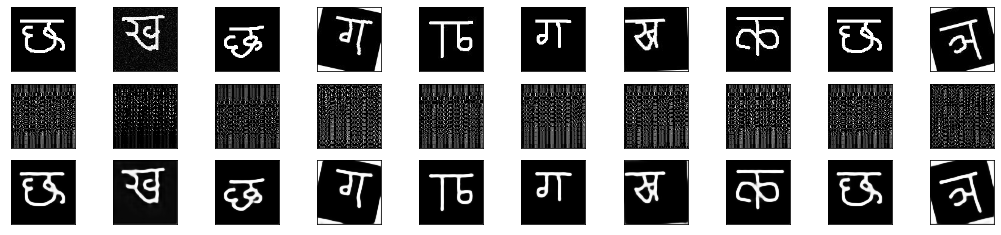

In [0]:
# Display some images & their reconstructed images 

print('Original Images -> Extracted Features -> Reconstructed Images')
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(128,128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(64,64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Reference: 
https://ramhiser.com/post/2018-05-14-autoencoders-with-keras/

Tutorial by E&ICT Academy, IIITDM Jabalpur ( Prof. Aparajita Ojha,  Nishant Khare, Samir Jain and Poornima Singh Thakur)